___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)


# Ingest the data to notebook

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0    2.300      0   
1   37    1   2       130   250    0        1      187      0    3.500      0   
2   41    0   1       130   204    0        0      172      0    1.400      2   
3   56    1   1       120   236    0        1      178      0    0.800      2   
4   57    0   0       120   354    0        1      163      1    0.600      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.shape

(303, 14)

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.target.value_counts()
#We have a balanced data in terms of the target value

1    165
0    138
Name: target, dtype: int64

In [6]:
df.columns
#Some of the colums have categorical values, so we need to use get_dummies function.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})

#These details are given at the beginning of the notebook.

In [10]:
df.describe().T

count    mean    std     min     25%     50%     75%     max
age      303.000  54.366  9.082  29.000  47.500  55.000  61.000  77.000
sex      303.000   0.683  0.466   0.000   0.000   1.000   1.000   1.000
trestbps 303.000 131.624 17.538  94.000 120.000 130.000 140.000 200.000
chol     303.000 246.264 51.831 126.000 211.000 240.000 274.500 564.000
fbs      303.000   0.149  0.356   0.000   0.000   0.000   0.000   1.000
thalach  303.000 149.647 22.905  71.000 133.500 153.000 166.000 202.000
exang    303.000   0.327  0.470   0.000   0.000   0.000   1.000   1.000
oldpeak  303.000   1.040  1.161   0.000   0.000   0.800   1.600   6.200
ca       303.000   0.729  1.023   0.000   0.000   0.000   1.000   4.000
target   303.000   0.545  0.499   0.000   0.000   1.000   1.000   1.000

<AxesSubplot:xlabel='age'>

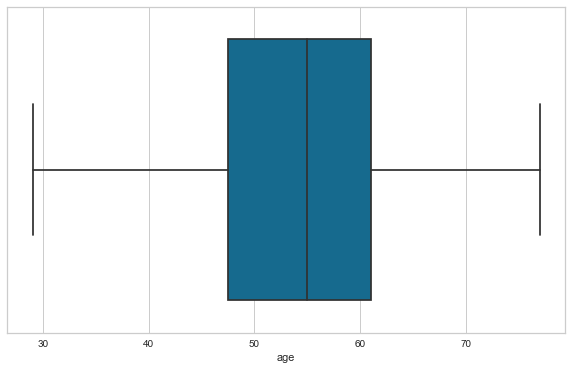

In [11]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='trestbps'>

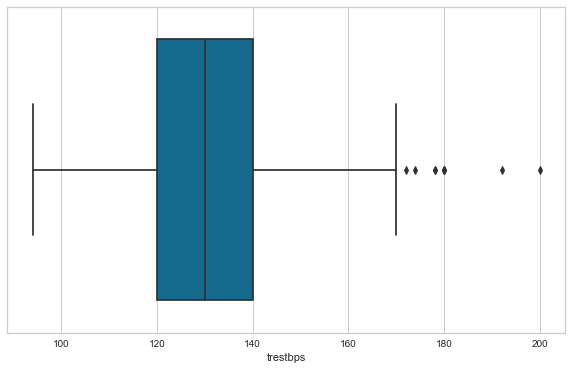

In [12]:
sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='chol'>

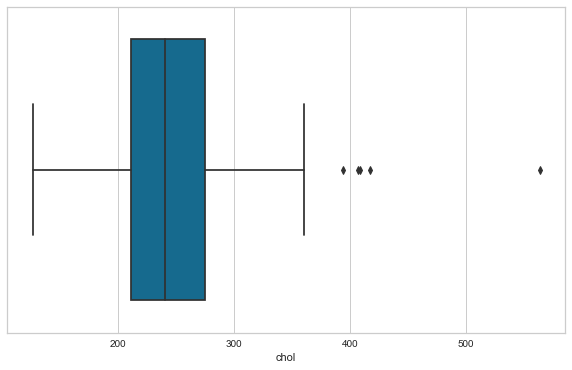

In [13]:
sns.boxplot(df.chol)

In [14]:
df = df[df.chol<375]
#We think chol values greater than 375 are outliers.

<AxesSubplot:xlabel='ca'>

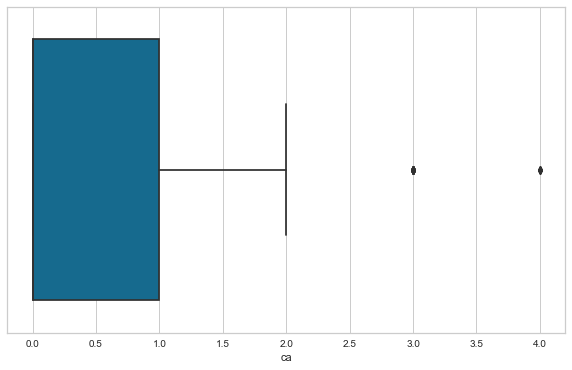

In [16]:
sns.boxplot(df.ca)

In [17]:
df=df[df.ca<2.5]

<AxesSubplot:>

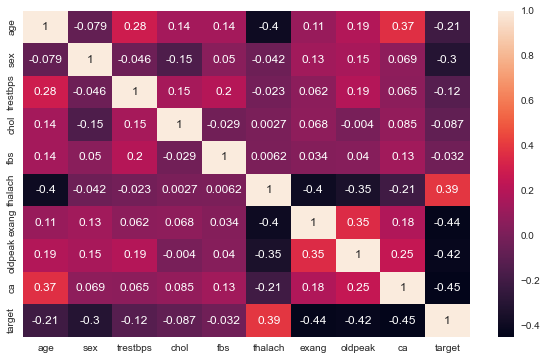

In [21]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

# Data Preprocessing

In [22]:
df=pd.get_dummies(df,drop_first=True)
df

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  \
0     63    1       145   233    1      150      0    2.300   0       1   
1     37    1       130   250    0      187      0    3.500   0       1   
2     41    0       130   204    0      172      0    1.400   0       1   
3     56    1       120   236    0      178      0    0.800   0       1   
4     57    0       120   354    0      163      1    0.600   0       1   
..   ...  ...       ...   ...  ...      ...    ...      ...  ..     ...   
298   57    0       140   241    0      123      1    0.200   0       0   
299   45    1       110   264    0      132      0    1.200   0       0   
300   68    1       144   193    1      141      0    3.400   2       0   
301   57    1       130   131    0      115      1    1.200   1       0   
302   57    0       130   236    0      174      0    0.000   1       0   

     cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                     0                    0                  0   
1                     0                    1                  0   
2                     1                    0                  0   
3                     1                    0                  0   
4                     0                    0                  1   
..                  ...                  ...                ...   
298                   0                    0                  1   
299                   0                    0                  0   
300                   0                    0                  1   
301                   0                    0                  1   
302                   1                    0                  0   

     restecg_left ventricular hypertrophy  restecg_normal  slope_flat  \
0                                       0               1           0   
1                                       0               0           0   
2                                       0               1           1   
3                                       0               0           1   
4                                       0               0           1   
..                                    ...             ...         ...   
298                                     0               0           0   
299                                     0               0           0   
300                                     0               0           0   
301                                     0               0           0   
302                                     0               1           0   

     slope_upsloping  thal_1  thal_2  thal_normal  
0                  0       1       0            0  
1                  0       0       1            0  
2                  0       0       1            0  
3                  0       0       1            0  
4                  0       0       1            0  
..               ...     ...     ...          ...  
298                1       0       0            1  
299                1       0       0            1  
300                1       0       0            1  
301                1       0       0            1  
302                1       0       1            0  

[274 rows x 20 columns]

In [23]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [42]:
log_mod = LogisticRegression()

In [43]:
log_mod.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = log_mod.predict(X_test_scaled)

In [45]:
y_pred_prob = log_mod.predict_proba(X_test_scaled)

### Model Performance

In [46]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [47]:
eval_metric(log_mod,X_train_scaled,y_train,X_test_scaled,y_test)


Test_Set
[[26  4]
 [ 1 38]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.90      0.97      0.94        39

    accuracy                           0.93        69
   macro avg       0.93      0.92      0.93        69
weighted avg       0.93      0.93      0.93        69


Train_Set
[[ 69  20]
 [ 10 106]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.84      0.91      0.88       116

    accuracy                           0.85       205
   macro avg       0.86      0.84      0.85       205
weighted avg       0.86      0.85      0.85       205



## Cross Validation

In [48]:
model = LogisticRegression()

#For Cross Validation to check with default parameters

In [49]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)

In [50]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores 

fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1      0.027       0.009           0.786        0.917    0.846          0.810
2      0.031       0.010           0.857        1.000    0.923          0.905
3      0.030       0.041           0.667        0.667    0.667          0.619
4      0.028       0.013           0.692        0.750    0.720          0.667
5      0.023       0.012           1.000        0.917    0.957          0.952
6      0.014       0.005           0.833        0.909    0.870          0.850
7      0.012       0.006           0.769        0.909    0.833          0.800
8      0.017       0.005           0.909        0.909    0.909          0.900
9      0.026       0.009           0.900        0.818    0.857          0.850
10     0.020       0.004           0.917        0.917    0.917          0.900

In [59]:
df_scores.mean()[2:]

#There is no imbalance or overfitting-underfitting situation. The results of CV and confusion matrix are similar.

test_precision   0.833
test_recall      0.871
test_f1          0.850
test_accuracy    0.825
dtype: float64

## GridSearchCV

In [61]:
model = LogisticRegression()

#For GridSearch to find the best parameters for our test.

In [62]:
penalty = ["l1", "l2"]                # l1 ve l2 skorlarına bakacağız.

C = np.logspace(-1, 5, 20)            # C parametresi logspace aralığında daha iyi sonuçlar verir. (Hangi sayının logunu aldığımda bu aralıktan bir sayı döndürür?)

class_weight= ["balanced", None]      # Classlar arası dengeleme yapsın veya yapmasın.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data

solver = ["lbfgs", "liblinear", "sag", "saga"]   # Gradient descent methodlarından hangisini kullanayım?

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",      # 1 sınıfına ait en iyi recall'ı hangi parametreler getirecek? Bunu hesaplar. 
                          n_jobs = -1)             # Recall dedik çünkü skorlarımızda bu değer kötü. f1 de diyebilirdik. Sırayla denenebilir.

#For this data, Recall score is more important.

In [63]:
grid_model.fit(X_train_scaled,y_train)
#Train the model

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06...
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                

In [64]:
grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'saga'}

In [65]:
y_pred = grid_model.predict(X_test_scaled)

In [66]:
eval_metric(grid_model,X_train_scaled,y_train,X_test_scaled,y_test)

Test_Set
[[26  4]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.90      0.95      0.92        39

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69


Train_Set
[[ 66  23]
 [ 11 105]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        89
           1       0.82      0.91      0.86       116

    accuracy                           0.83       205
   macro avg       0.84      0.82      0.83       205
weighted avg       0.84      0.83      0.83       205



## ROC-AUC 

In [67]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

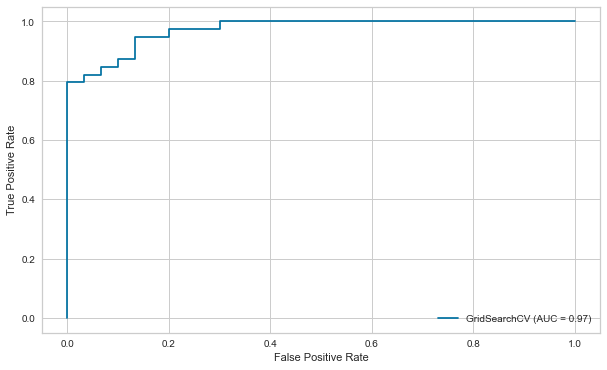

In [68]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

In [69]:
y_pred_proba = log_mod.predict_proba(X_train_scaled)  # Train setindeki predict_proba' yı aldık ki yukardaki grafikteki skorla karşılaştırabilelim.           # roc_ouc_score içine eğittiğimiz y yi ve y_train'den aldığımız proba'nın 1 sınıfı için olan değerlerini verdik.

In [72]:
roc_auc_score(y_train, y_pred_proba[:,1])
# Success rate with the default threshold value of 0.5

0.9235761332816738

## Finding the best threshold

In [76]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [81]:
fp_rate

array([0.        , 0.        , 0.        , 0.01123596, 0.01123596,
       0.02247191, 0.02247191, 0.03370787, 0.03370787, 0.04494382,
       0.04494382, 0.06741573, 0.06741573, 0.08988764, 0.08988764,
       0.1011236 , 0.1011236 , 0.11235955, 0.11235955, 0.12359551,
       0.12359551, 0.14606742, 0.14606742, 0.17977528, 0.17977528,
       0.20224719, 0.20224719, 0.21348315, 0.21348315, 0.2247191 ,
       0.2247191 , 0.25842697, 0.25842697, 0.29213483, 0.29213483,
       0.33707865, 0.33707865, 0.34831461, 0.34831461, 0.38202247,
       0.38202247, 0.4494382 , 0.4494382 , 0.46067416, 0.46067416,
       0.87640449, 0.87640449, 1.        ])

In [82]:
tp_rate

array([0.        , 0.00862069, 0.1637931 , 0.1637931 , 0.35344828,
       0.35344828, 0.5       , 0.5       , 0.51724138, 0.51724138,
       0.72413793, 0.72413793, 0.74137931, 0.74137931, 0.75      ,
       0.75      , 0.78448276, 0.78448276, 0.79310345, 0.79310345,
       0.80172414, 0.80172414, 0.85344828, 0.85344828, 0.87068966,
       0.87068966, 0.87931034, 0.87931034, 0.90517241, 0.90517241,
       0.9137931 , 0.9137931 , 0.93965517, 0.93965517, 0.94827586,
       0.94827586, 0.95689655, 0.95689655, 0.96551724, 0.96551724,
       0.97413793, 0.97413793, 0.98275862, 0.98275862, 0.99137931,
       0.99137931, 1.        , 1.        ])

In [84]:
opt_threshold_index = np.argmax(tp_rate - fp_rate)
opt_threshold_index
#Find the index number where the difference is maximum.

22

In [85]:
best_threshold = thresholds[opt_threshold_index]
best_threshold

0.5595701330064587

## Finding and testing the best alpha

In [93]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= best_threshold else 0)
y_pred2

0     0
1     0
2     0
3     0
4     1
     ..
64    0
65    0
66    1
67    1
68    1
Length: 69, dtype: int64

In [94]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

#Recall value is smaller so we don't take best alpha into account.

[[27  3]
 [ 6 33]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.92      0.85      0.88        39

    accuracy                           0.87        69
   macro avg       0.87      0.87      0.87        69
weighted avg       0.87      0.87      0.87        69



## Final Model for Logistic Regression

In [97]:
grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'saga'}

In [99]:
final_model_log = LogisticRegression(C= 0.42813323987193935, class_weight= None,penalty= 'l1',solver= 'saga')

In [100]:
scaler = MinMaxScaler()

In [102]:
X_scaled = scaler.fit_transform(X)

In [103]:
final_model_log.fit(X_scaled,y)

LogisticRegression(C=0.42813323987193935, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_pred3 = final_model_log.predict(X_scaled)

In [106]:
print(confusion_matrix(y,y_pred3))
print(classification_report(y,y_pred3))

[[ 96  23]
 [ 16 139]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       119
           1       0.86      0.90      0.88       155

    accuracy                           0.86       274
   macro avg       0.86      0.85      0.85       274
weighted avg       0.86      0.86      0.86       274



# Implement KNN and Evaluate

In [107]:
knn_mod = KNeighborsClassifier()

In [108]:
knn_mod.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
y_pred_knn = knn_mod.predict(X_test_scaled)
y_pred_knn

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1])

In [115]:
y_pred_proba = knn_mod.predict_proba(X_test_scaled)

## Model Performance

In [116]:
eval_metric(knn_mod,X_train_scaled,y_train,X_test_scaled,y_test)

Test_Set
[[24  6]
 [ 3 36]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.86      0.92      0.89        39

    accuracy                           0.87        69
   macro avg       0.87      0.86      0.87        69
weighted avg       0.87      0.87      0.87        69


Train_Set
[[ 72  17]
 [ 13 103]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        89
           1       0.86      0.89      0.87       116

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



## Elbow Method

In [118]:
test_error_rates = []

for k in range(1,30):
    knn_mod = KNeighborsClassifier(n_neighbors=k)
    knn_mod.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_mod.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

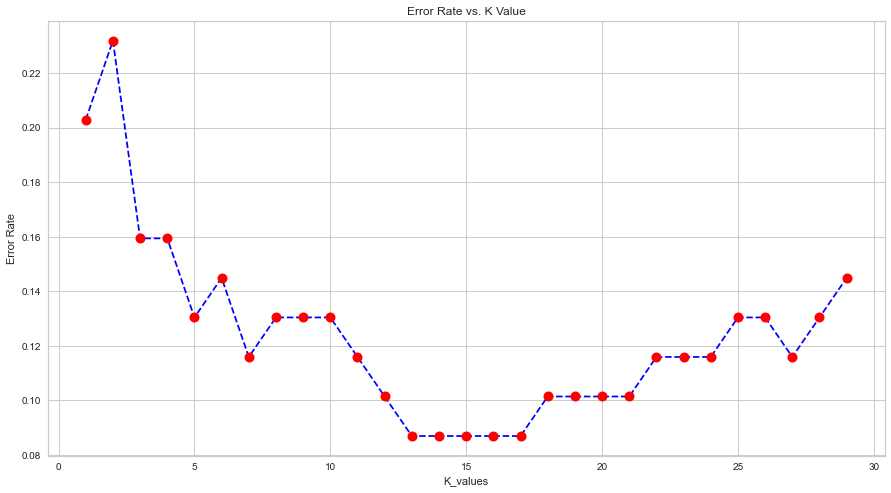

In [121]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
# plt.hlines(y=0.075, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

## Scores for different K numbers

In [122]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set
[[24  6]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.86      0.95      0.90        39

    accuracy                           0.88        69
   macro avg       0.89      0.87      0.88        69
weighted avg       0.89      0.88      0.88        69


Train_Set
[[72 17]
 [19 97]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        89
           1       0.85      0.84      0.84       116

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



In [125]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set
[[26  4]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.90      0.95      0.92        39

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69


Train_Set
[[71 18]
 [17 99]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        89
           1       0.85      0.85      0.85       116

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [124]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train_scaled,y_train)
print('WITH K=20\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=20

Test_Set
[[26  4]
 [ 3 36]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.90      0.92      0.91        39

    accuracy                           0.90        69
   macro avg       0.90      0.89      0.90        69
weighted avg       0.90      0.90      0.90        69


Train_Set
[[72 17]
 [20 96]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        89
           1       0.85      0.83      0.84       116

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



## Cross Validate

In [129]:
model_cv = KNeighborsClassifier(n_neighbors=13)

scores = cross_validate(model_cv, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.002       0.009          0.810           0.833        0.833    0.833
2      0.001       0.010          0.810           0.833        0.833    0.833
3      0.002       0.009          0.762           0.818        0.750    0.783
4      0.002       0.008          0.619           0.667        0.667    0.667
5      0.001       0.007          0.952           1.000        0.917    0.957
6      0.002       0.009          0.850           0.833        0.909    0.870
7      0.001       0.006          0.750           0.750        0.818    0.783
8      0.001       0.008          0.750           0.750        0.818    0.783
9      0.002       0.013          0.800           0.889        0.727    0.800
10     0.002       0.011          0.950           1.000        0.917    0.957

In [130]:
df_scores.mean()[2:]

test_accuracy    0.805
test_precision   0.837
test_recall      0.819
test_f1          0.826
dtype: float64

In [132]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[26  4]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.90      0.95      0.92        39

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69


Train_Set
[[71 18]
 [17 99]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        89
           1       0.85      0.85      0.85       116

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



## Gridsearch Method for Choosing Reasonable K Values

In [135]:
knn_grid = KNeighborsClassifier(n_neighbors=1)


In [136]:
k_values= range(1,30)

In [137]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [138]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [139]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [140]:
knn_grid_model.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

In [141]:
print('WITH K=28\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=28

Test_Set
[[24  6]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.86      0.95      0.90        39

    accuracy                           0.88        69
   macro avg       0.89      0.87      0.88        69
weighted avg       0.89      0.88      0.88        69


Train_Set
[[ 89   0]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       116

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Evaluating ROC Curves and AUC

In [142]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [143]:
knn_model = KNeighborsClassifier(n_neighbors=28).fit(X_train_scaled, y_train)

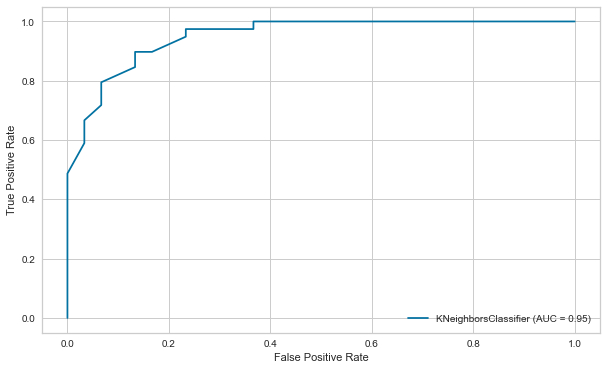

In [144]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

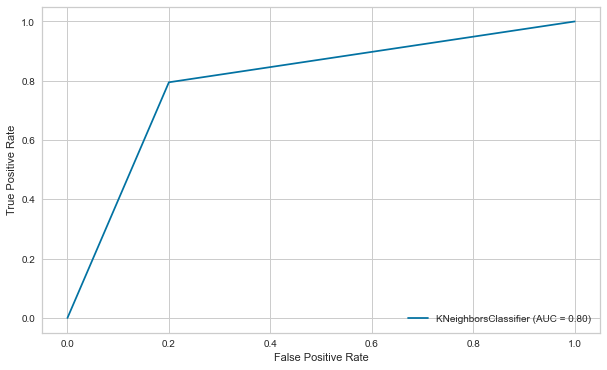

In [153]:
plot_roc_curve(knn, X_test_scaled, y_test)

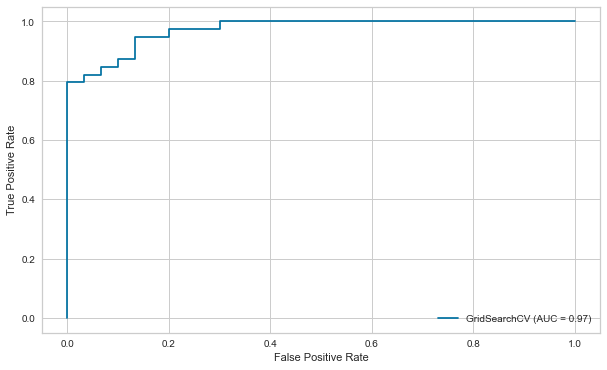

In [155]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

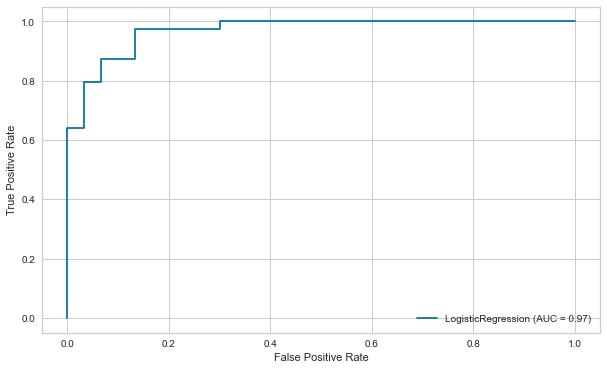

In [160]:
plot_roc_curve(log_mod, X_test_scaled, y_test)

In [159]:
y_pred_proba = knn.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.7974358974358975

# Visually compare models based on your chosen metric

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

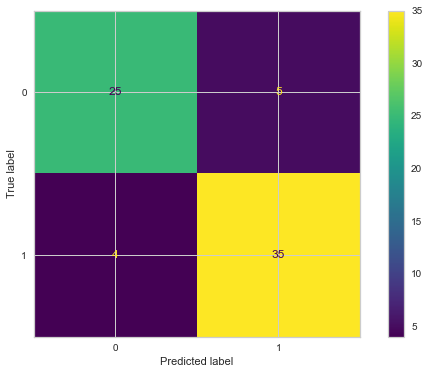

In [151]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

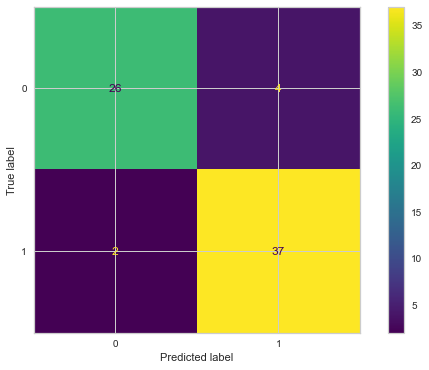

In [156]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

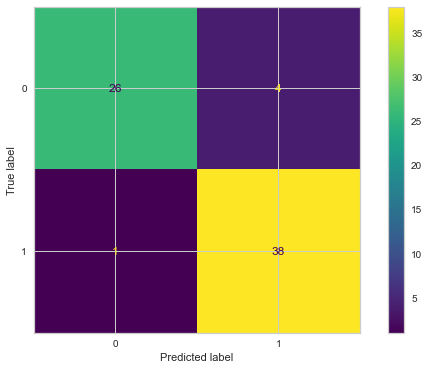

In [158]:
plot_confusion_matrix(log_mod, X_test_scaled, y_test);